In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [39]:
np.random.seed(8675309)

numDays = 60
numReps = 10000
orderDelay = 4 # takes 4 days to receive an order

all_total_costs = np.zeros((numReps))
all_holding_costs = np.zeros((numReps, numDays))
all_fixed_order_costs = np.zeros((numReps, numDays))
all_unfulfilled_demand = np.zeros((numReps, numDays))

def run_sim(R=50, Q=100, initial_inventory=100):
    I = np.zeros(numDays)  # Beginning of day on-hand inventory level
    E = np.zeros(numDays) # end of day on-hand inventory level
    # P = np.zeros(numDays) # pipeline inventory level
    pipeline_inventory = 0 # pipeline inventory level

    Fixed_order_cost = np.zeros(numDays)
    Procurement_cost = np.zeros(numDays) 
    Holding_cost = np.zeros(numDays)
    Total_cost = np.zeros(numDays)
    orderQuantity = np.zeros(numDays)
    unfulfilled_demand = np.zeros(numDays)
    order_placed = np.zeros(numDays) # to track if an order was placed
    pipeline_inventories = np.zeros(numDays) # to track pipeline inventory levels
    

    I[0] = initial_inventory # Initial inventory level
    # P[0] = 0 # Initial pipeline inventory level

    # Generating daily random demand
    demand = np.maximum(0, np.round(np.random.normal(20, 5, numDays)))

    for day in range(numDays):
        # Check if order was placed 4 days ago
        if day >= orderDelay and order_placed[day - orderDelay]:
            I[day] += orderQuantity[day - orderDelay]
            pipeline_inventory -= orderQuantity[day - orderDelay]
            pipeline_inventories[day] = pipeline_inventory

        if demand[day] <= I[day]:
            E[day] = I[day] - demand[day]
            unfulfilled_demand[day] = 0
            if day + 1 < numDays:
                I[day + 1] = E[day]
        else:
            unfulfilled_demand[day] = demand[day] - I[day]
            E[day] = 0
            if day + 1 < numDays:
                I[day + 1] = E[day]

        if E[day] + pipeline_inventory < R: # if eod inventory + pipeline inventory < reorder point, place an order
            # Place Order
            order_placed[day] = True
            orderQuantity[day] = Q
            Fixed_order_cost[day] = 50
            Procurement_cost[day] = orderQuantity[day] * 10
            pipeline_inventory += orderQuantity[day] # add order to pipeline inventory
            pipeline_inventories[day] = pipeline_inventory
            
        else:
            # No order placed
            order_placed[day] = False
            orderQuantity[day] = 0
            Fixed_order_cost[day] = 0
            Procurement_cost[day] = 0
            pipeline_inventories[day] = pipeline_inventory # track pipeline inventory level

        Holding_cost[day] = .2 * E[day]
        Total_cost[day] = Fixed_order_cost[day] + Procurement_cost[day] + Holding_cost[day]

        # print("Day: ", day)
        # print('-' *20)
        # if order_placed[day - 4]:
        #     print("Order Fufilled: Yes")
        # print("Beginning Inventory: ", I[day])
        # print("Demand: ", demand[day])
        # print("Unfulfilled Demand: ", unfulfilled_demand[day])
        # print("End Inventory: ", E[day])
        # print("Pipeline Inventory Beginning Day: ", pipeline_inventories[day-1])
        # print("Order Placed: ", order_placed[day])
        # print("Order Quantity: ", orderQuantity[day])
        # print("Pipeline Inventory End Day: ", pipeline_inventory)
        # print("Fixed Order Cost: ", Fixed_order_cost[day])
        # print("Procurement Cost: ", Procurement_cost[day])
        # print("Holding Cost: ", Holding_cost[day])
        # print('-' *20)
        # print("Total Cost: ", Total_cost[day])
        # print()
        # print()

    return Total_cost.sum(), Holding_cost.sum(), Fixed_order_cost.sum(), unfulfilled_demand.sum()


# total_cost, holding_cost, fixed_cost, unfulfilled_demand = run_sim(R=50, Q=100, initial_inventory=100)
for rep in range(numReps):
    total_cost, holding_cost, fixed_cost, unfulfilled_demand = run_sim(R=50, Q=100, initial_inventory=100)
    all_total_costs[rep] = total_cost
    all_holding_costs[rep] = holding_cost
    all_fixed_order_costs[rep] = fixed_cost
    all_unfulfilled_demand[rep] = unfulfilled_demand

print("Average Total Inventory Cost: ", all_total_costs.mean())
print("Average Holding Cost: ", all_holding_costs.mean())
print("Average Fixed Order Cost: ", all_fixed_order_costs.mean())
print("Average Unfulfilled Demand: ", all_unfulfilled_demand.mean())

Average Total Inventory Cost:  10897.596
Average Holding Cost:  413.0309999999999
Average Fixed Order Cost:  499.265
Average Unfulfilled Demand:  204.1417


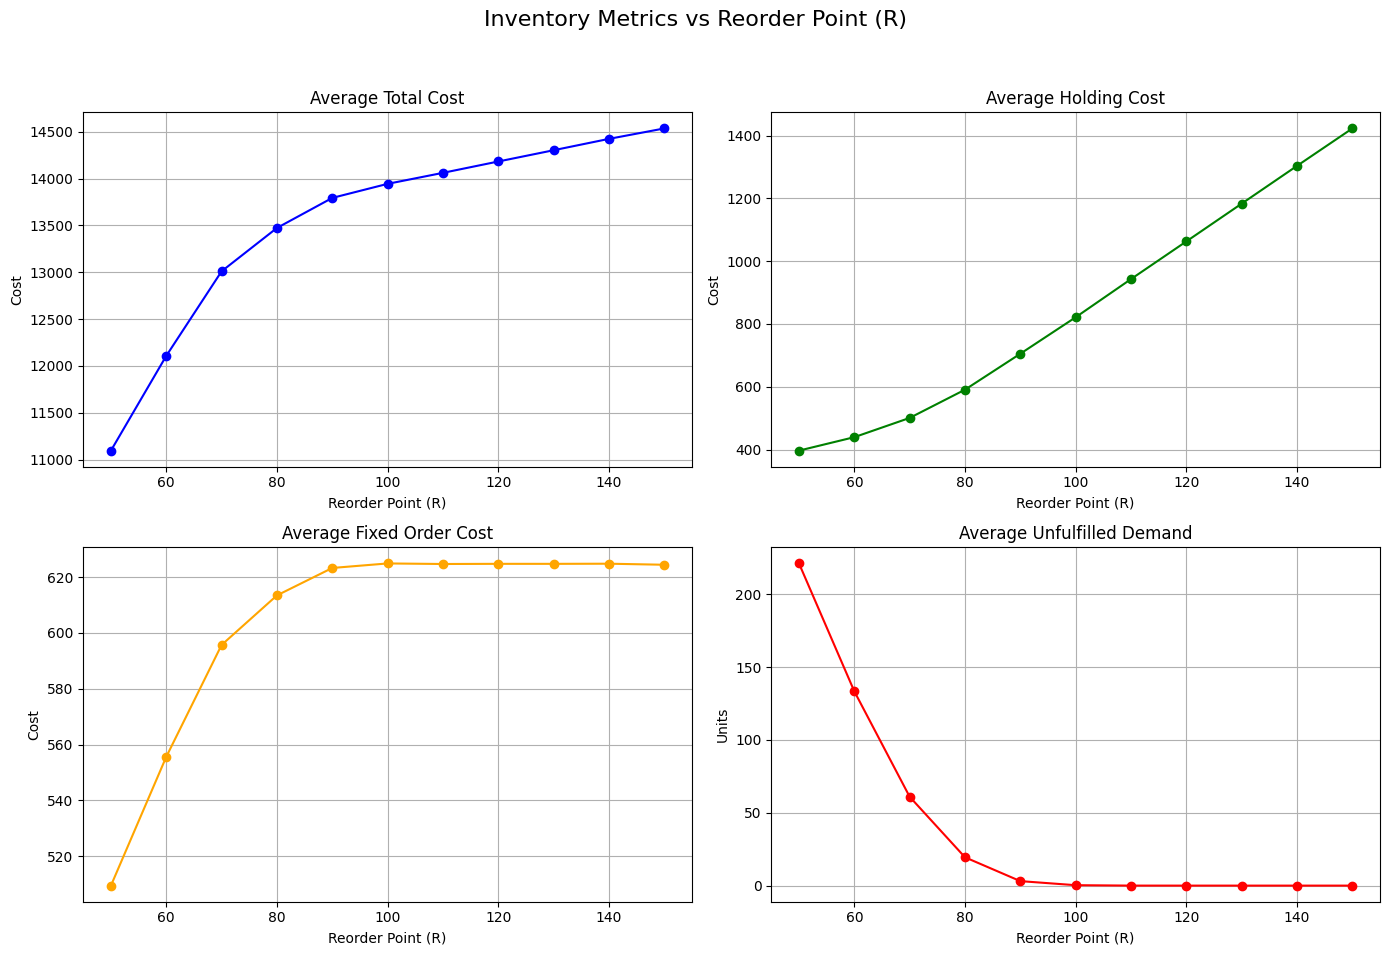

In [ ]:
R_values = np.arange(50, 151, 10)  # R from 50 to 150 in steps of 10
avg_total_costs = []
avg_holding_costs = []
avg_fixed_order_costs = []
avg_unfulfilled_demand = []

for R in R_values:
    total_costs, holding_costs, fixed_costs, unfulfilled_demands = [], [], [], []
    for _ in range(numReps):
        total, holding, fixed, unfulfilled = run_sim(R=R, initial_inventory=R)
        total_costs.append(total)
        holding_costs.append(holding)
        fixed_costs.append(fixed)
        unfulfilled_demands.append(unfulfilled)

    avg_total_costs.append(np.mean(total_costs))
    avg_holding_costs.append(np.mean(holding_costs))
    avg_fixed_order_costs.append(np.mean(fixed_costs))
    avg_unfulfilled_demand.append(np.mean(unfulfilled_demands))

# Plot each metric in a separate graph
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Inventory Metrics vs Reorder Point (R)', fontsize=16)

# Total Cost
axs[0, 0].plot(R_values, avg_total_costs, marker='o', color='blue')
axs[0, 0].set_title('Average Total Inventory Cost')
axs[0, 0].set_xlabel('Reorder Point (R)')
axs[0, 0].set_ylabel('Cost')
axs[0, 0].grid(True)

# Holding Cost
axs[0, 1].plot(R_values, avg_holding_costs, marker='o', color='green')
axs[0, 1].set_title('Average Holding Cost')
axs[0, 1].set_xlabel('Reorder Point (R)')
axs[0, 1].set_ylabel('Cost')
axs[0, 1].grid(True)

# Fixed Order Cost
axs[1, 0].plot(R_values, avg_fixed_order_costs, marker='o', color='orange')
axs[1, 0].set_title('Average Fixed Order Cost')
axs[1, 0].set_xlabel('Reorder Point (R)')
axs[1, 0].set_ylabel('Cost')
axs[1, 0].grid(True)

# Unfulfilled Demand
axs[1, 1].plot(R_values, avg_unfulfilled_demand, marker='o', color='red')
axs[1, 1].set_title('Average Unfulfilled Demand')
axs[1, 1].set_xlabel('Reorder Point (R)')
axs[1, 1].set_ylabel('Units')
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Part B Answer:

Increasing both the inital inventory and reorder threshold would:
- Increase Average Total Inventory Costs
    - With a higher threshold you are ordering more often, this will result in higher ending inventories, more frequent orders, and more units ordered in total. Therefore, your holding costs, fixed order costs, and procurement costs will all increase, resulting in a higher total inventory costs.

###

- Increase Average Holding Costs
    - As you increase R which is the threshold and your starting inventory, you will be ordering more often and start with more inventory and thus have more excess ending inventory, this will result in higher holding costs

###

- Decrease Average Unfulfilled Demand
    - As you increase R, you order more frequently and your starting inventory gets larger. This means that you will have more on hand inventory leading to less unfulfilled demand.

